In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [5]:
dataset=pd.read_csv("Placement.csv")

In [6]:
dataset.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [7]:
import seaborn as sns

In [8]:
#!pip install seaborn

/tmp/ipython-input-2590864738.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ssc_p"])


<Axes: xlabel='ssc_p', ylabel='Density'>

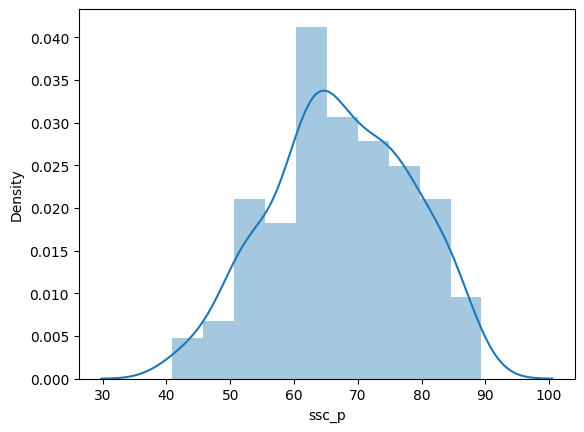

In [9]:
sns.distplot(dataset["ssc_p"])

In [10]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)

    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    #probabilities = [dist.pdf(value) for value in values]
    probabilities = []
    for value in values:
        probabilities.append(dist.pdf(value))
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob


Mean=67.303, Standard Deviation=10.827
The area between range(60,70):0.3449514151280293


/tmp/ipython-input-3337868320.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


np.float64(0.3449514151280293)

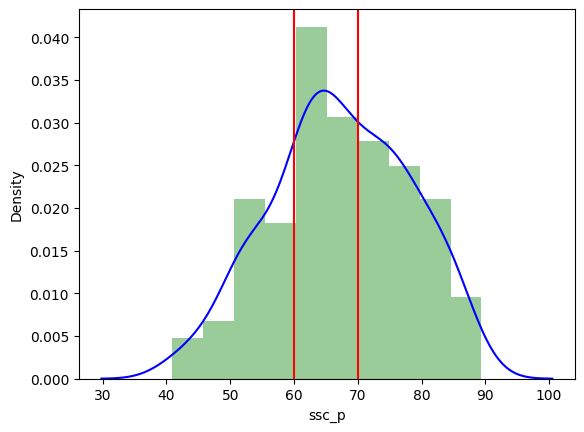

In [11]:
get_pdf_probability(dataset["ssc_p"],60,70)

In [12]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['ssc_p'])
ecdf(80)

np.float64(0.8651162790697674)

In [13]:
#!pip install statsmodels

In [14]:
def stdNBgraph(dataset):
        # Coverted to standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)
    #z_score.std()


/tmp/ipython-input-2909774602.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)


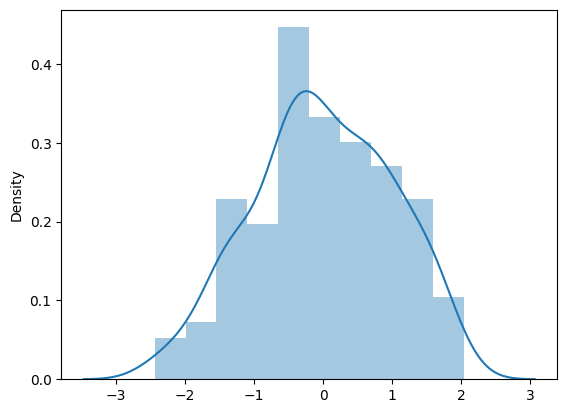

In [15]:
stdNBgraph(dataset["ssc_p"])

In [16]:
dataset.drop('sl_no', inplace=True, axis=1)

In [17]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [18]:
import seaborn as sns

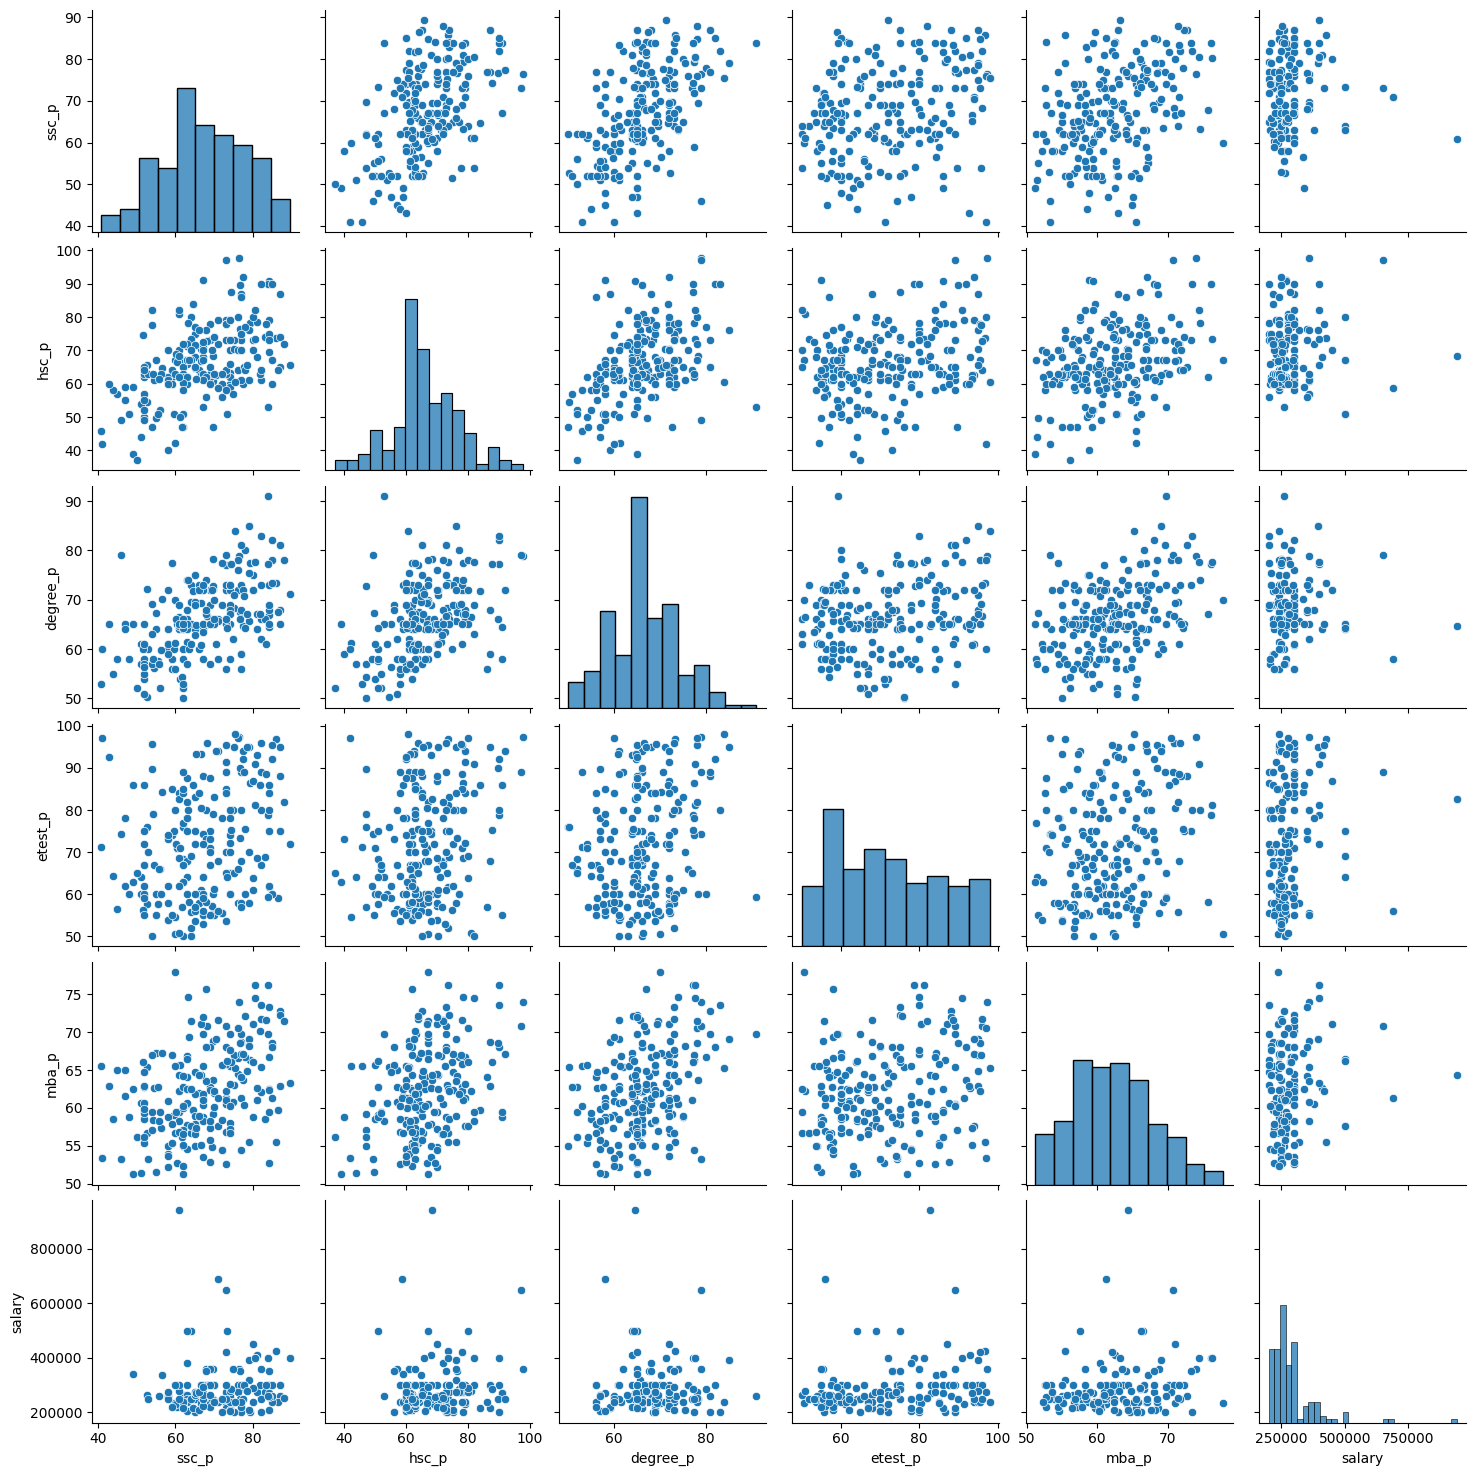

In [19]:
sns.pairplot(dataset)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    #Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [21]:
calc_vif(dataset[["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p", "salary"]].dropna())

,variables,VIF
0,ssc_p,92.542386
1,hsc_p,64.913495
2,degree_p,133.057116
3,etest_p,35.980186
4,mba_p,167.558834
5,salary,11.166150


In [22]:
calc_vif(dataset[["etest_p", "salary"]].dropna())

,variables,VIF
0,etest_p,9.440124
1,salary,9.440124


In [23]:
dataset_cleaned = dataset.dropna(subset=['salary'])
X = dataset_cleaned[['etest_p']]
y = dataset_cleaned['salary']

from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X, y)

Ridge()

In [25]:
performance_income_score = dataset_cleaned['etest_p'] + dataset_cleaned['salary']

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

dataset_cleaned[['etest_p_std', 'salary_std']] = scaler.fit_transform(
    dataset_cleaned[['etest_p', 'salary']]
)


/tmp/ipython-input-3035983556.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cleaned[['etest_p_std', 'salary_std']] = scaler.fit_transform(
/tmp/ipython-input-3035983556.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cleaned[['etest_p_std', 'salary_std']] = scaler.fit_transform(


In [27]:
dataset_cleaned['performance_income_score'] = (
    dataset_cleaned['etest_p_std'] + dataset_cleaned['salary_std']
)


/tmp/ipython-input-338259206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cleaned['performance_income_score'] = (


In [28]:
performance_income_score


,0
0,270055.0
1,200086.5
2,250075.0
4,425096.8
7,252067.0
...,...
209,216067.0
210,400091.0
211,275074.0
212,295059.0


In [30]:
print(dataset_cleaned['etest_p'])
print(dataset_cleaned['salary'])

0      55.0
1      86.5
2      75.0
4      96.8
7      67.0
       ... 
209    67.0
210    91.0
211    74.0
212    59.0
213    70.0
Name: etest_p, Length: 148, dtype: float64
0      270000.0
1      200000.0
2      250000.0
4      425000.0
7      252000.0
         ...   
209    216000.0
210    400000.0
211    275000.0
212    295000.0
213    204000.0
Name: salary, Length: 148, dtype: float64


In [31]:
X = dataset_cleaned[['performance_income_score']]


In [33]:
calc_vif(dataset_cleaned[['etest_p', 'salary']])

,variables,VIF
0,etest_p,9.440124
1,salary,9.440124


In [37]:
# VIF approx 1